In [1]:
from QAOAUtils import *
from PSC import *
import pickle as pkl
from oputils import *
from tqdm import tqdm
from tqdm.contrib import itertools
from tqdm.notebook import tqdm

(CVXPY) Sep 10 08:20:16 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [2]:
depth_DATA= pkl.load( open ("PortfolioOptDepth0Test.p", "rb") )
stock_DATA= pkl.load( open ("stock_data_depth0.p", "rb") )
PO_A_list = [depth_DATA[3][i] for i in range(1000)]
comp_dict = {'new':[[],[]],'old':[[],[]],}

In [6]:
for _ in tqdm(range(10)):
    A = PO_A_list[_]
    PO_data = stock_DATA[_]

    old = PSC_Run(A,opt=None,p_max=0,optimizer_kwargs={'name':None,'verbose':True},keep_hist=False,eps=0.1,reps=10,PO_data=None)
    comp_dict['old'][0].append(old[0]['cost'])
    comp_dict['old'][1].append(old[0]['probs'])

    new = PSC_Run(A,opt=None,p_max=0,optimizer_kwargs={'name':None,'verbose':True},keep_hist=False,eps=0.1,reps=10,PO_data=PO_data)
    comp_dict['new'][0].append(new[0]['cost'])
    comp_dict['new'][1].append(new[0]['probs'])

  0%|          | 0/10 [00:00<?, ?it/s]

In [26]:
M_list = []
m_list = []

for A in tqdm(PO_A_list):
	pre = pre_compute(A)
	M_list.append(np.max(pre))
	m_list.append(np.min(pre))

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
print(comp_dict['old'][1])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6074050281227997e-12, 6.425813717496496e-07, 6.425813717496502e-07, 6.425813717496496e-07, 1.5225147852903535e-09, 1.5225147852903535e-09, 6.425813717496502e-07, 6.425813717496496e-07, 1.5225147852903535e-09, 1.5225147852903541e-09]


In [34]:
old_alpha = (np.array(comp_dict['old'][0])-np.array(m_list))/(np.array(M_list)-np.array(m_list))
new_alpha = (np.array(comp_dict['new'][0])-np.array(m_list))/(np.array(M_list)-np.array(m_list))

old_P = np.array(comp_dict['old'][1])
new_P = np.array(comp_dict['new'][1])

ValueError: operands could not be broadcast together with shapes (25,) (16,) 

C:\Users\Micha\AppData\Local\Temp\ipykernel_17836\2535408085.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(alpha_data_to_plot, labels=['Old Alpha', 'New Alpha'], showfliers=False)


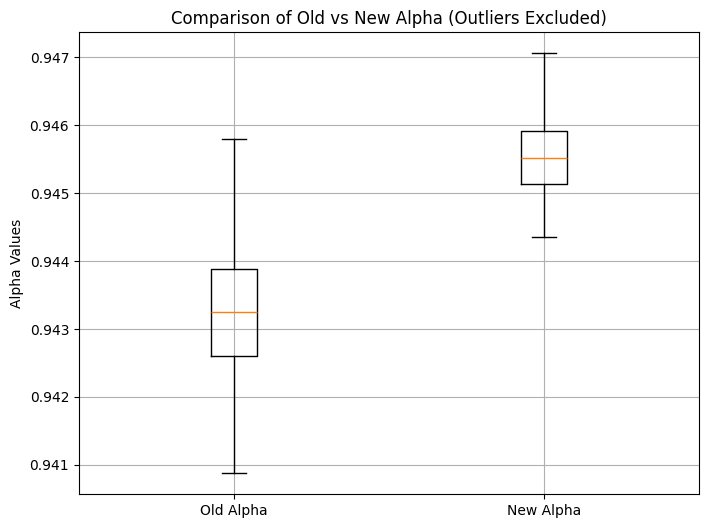

In [35]:
alpha_data_to_plot = [old_alpha, new_alpha]

# Create the boxplot for Alpha
plt.figure(figsize=(8, 6))
plt.boxplot(alpha_data_to_plot, labels=['Old Alpha', 'New Alpha'], showfliers=False)

# Add title and labels
plt.title('Comparison of Old vs New Alpha (Outliers Excluded)')
plt.ylabel('Alpha Values')
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Micha\AppData\Local\Temp\ipykernel_17836\1856720234.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(P_data_to_plot, labels=['Old P', 'New P'], showfliers=False)


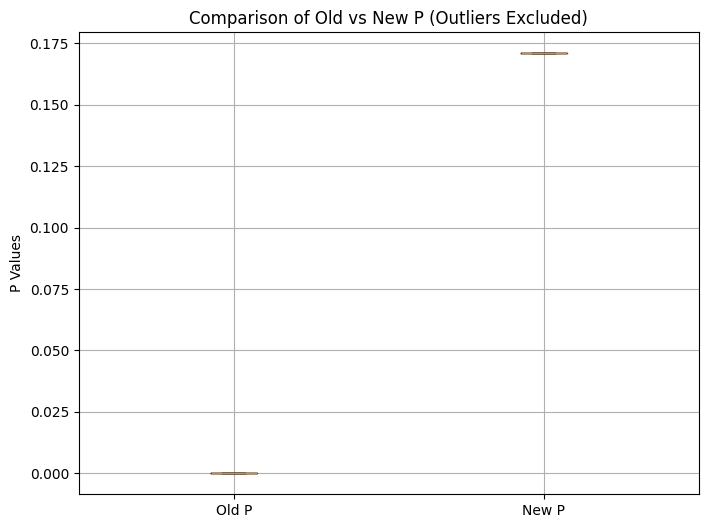

In [36]:
P_data_to_plot = [old_P, new_P]

# Create the boxplot for P
plt.figure(figsize=(8, 6))
plt.boxplot(P_data_to_plot, labels=['Old P', 'New P'], showfliers=False)

# Add title and labels
plt.title('Comparison of Old vs New P (Outliers Excluded)')
plt.ylabel('P Values')
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Micha\AppData\Local\Temp\ipykernel_17836\1975218333.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(P_data_to_plot, labels=['New P'], showfliers=False)


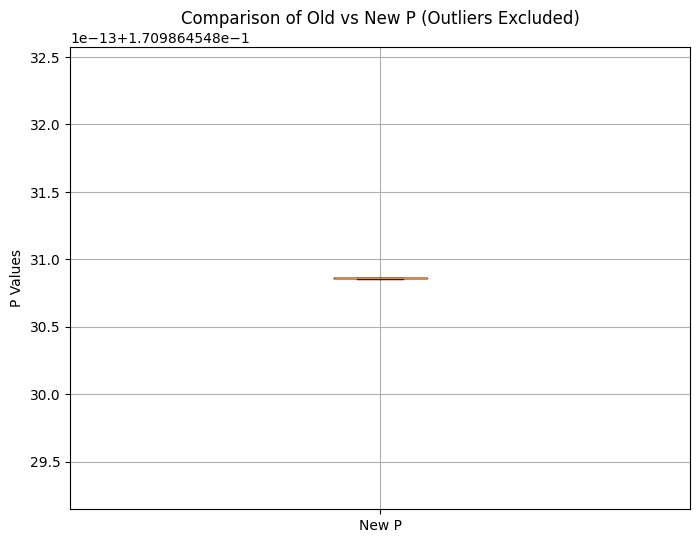

In [11]:
P_data_to_plot = [new_P]

# Create the boxplot for P
plt.figure(figsize=(8, 6))
plt.boxplot(P_data_to_plot, labels=['New P'], showfliers=False)

# Add title and labels
plt.title('Comparison of Old vs New P (Outliers Excluded)')
plt.ylabel('P Values')
plt.grid(True)

# Show the plot
plt.show()

print(new_P)

In [37]:
print(new_P)

[0.17098645 0.17098645 0.1616299  0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.05196731 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.13216403 0.17098645
 0.12499146 0.17098645 0.17098645 0.17098645 0.17098645 0.07745575
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.05358895 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.04532584 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.03848588
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.08277776 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645
 0.17098645 0.17098645 0.17098645 0.17098645 0.17098645 0.1709

In [14]:
f = 17
A = PO_A_list[f]
PO_data = stock_DATA[f]
Q = -A[:-1,:-1]
precomp = PSC_pre_compute(Q)
v,M=brute_force_maxcut(A)
if(PO_data is None):
    vals = relax_solve(Q)
else:
    vals = PO_solve(PO_data['mu'],PO_data['sigma'],B=len(PO_data['mu'])//2)
init,mixer_ops=PSC_data(vals,eps=0)

In [15]:
PSC_opt_sampling_prob(v,precomp,params=[],mixer_ops=mixer_ops,init=init)

0.9626468327381086

In [16]:
psi = QAOA_eval(precomp,[],mixer_ops,init)

In [17]:
print([map_reduce(x) for x in v])

[array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int32), array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int32)]


In [18]:
print(psi[46417]**2)

(0.9626468327381086+0j)


In [19]:
print(psi)

[1.64940558e-24+0.j 5.99413993e-21+0.j 1.42334296e-31+0.j ...
 9.76906547e-52+0.j 2.31972072e-62+0.j 8.43014644e-59+0.j]


In [20]:
print(vals)

[9.99999723e-01 7.61800089e-08 9.99999942e-01 9.99999946e-01
 4.70714762e-08 9.99997448e-01 9.85217884e-08 9.99999793e-01
 5.50673058e-08 9.99999967e-01 8.14676527e-08 9.81148831e-01
 6.31634585e-08 9.94588581e-09 8.62942977e-08 9.99999962e-01]


In [21]:
print(np.round(vals))

[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


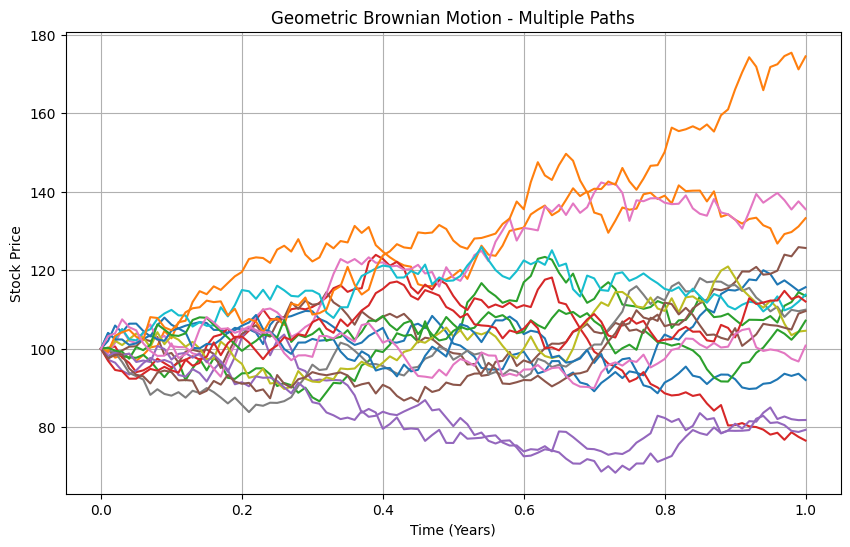

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
S0 = 100       # Initial stock price
mu = 0.05      # Drift coefficient (mean return)
sigma = 0.2    # Volatility coefficient
T = 1          # Time horizon (in years)
dt = 0.01      # Time step (in years)
N = int(T / dt)  # Number of time steps
M = 17         # Number of GBM paths to simulate

# Generate time steps
t = np.linspace(0, T, N+1)

# Set up the plot
plt.figure(figsize=(10, 6))

# Simulate multiple GBM paths
for _ in range(M):
    # Generate random Brownian motion
    W = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.concatenate(([0], np.cumsum(W)))  # Include the starting point
    
    # Calculate the GBM path
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    
    # Plot the GBM path
    plt.plot(t, S)

# Add plot details
plt.title('Geometric Brownian Motion - Multiple Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


In [120]:
def geometric_brownian_prices(max_drift=0.05, max_volatility=0.2, T=250, N=4):
    # Generate random drift and volatility for each path
    mu = np.random.random(N) * 2 * max_drift - max_drift
    sigma = np.random.random(N) * 2 * max_volatility - max_volatility

    # Generate the Wiener process (Brownian motion)
    dt = 1.0 / T
    W = np.array([np.concatenate(([0], np.cumsum(np.random.normal(0, np.sqrt(dt), T)) )) for _ in range(N)]).T

    # Initialize the asset prices
    init = np.ones(N)

    # Calculate the geometric Brownian motion paths
    return np.array([init * np.exp((mu - 0.5 * sigma**2) * t / T + sigma * W[t]) for t in range(T + 1)])

In [121]:
DATA = []
ws_list = ['GW2','GW3','BM2','BM3']
n = 17
rotation_options = list(range(n))+[None]
count=50

In [122]:
stock_data = []
def PO_A():
    price_data = geometric_brownian_prices(max_drift=0.05,max_volatility=0.2,T=250,N=n-1)
    price_data = np.random.permutation(price_data.T).T
    mu,sigma=mu_sigma(price_data)
    stock_data.append({'mu':mu,'sigma':sigma})
    _, Q = simple_PO_QUBO(mu,sigma,q=2,B=None,c=3)
    return dual_graph(Q)
comparison_data,best_angle_data,ws_data,A_list = depth0_ws_comp(n,A_func= PO_A,ws_list = ws_list,rotation_options = rotation_options,count=count)
DATA+=[comparison_data,best_angle_data,ws_data,A_list]

  0%|          | 0/50 [00:00<?, ?it/s]

In [123]:
pkl.dump( DATA, open( "SuperPortfolioOptDepth0Test.p", "wb" ) )
pkl.dump( stock_data, open( "Superstock_data_depth0.p", "wb" ) )